## This notebook reads a stack of geotiffs and loads it into xarrays

In [100]:
import xarray as xr
import numpy as np
import numpy.ma as ma
from pygeotools.lib import geolib, warplib, iolib, malib, timelib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm
import xs

In [7]:
import fitting

SyntaxError: invalid syntax (fitting.py, line 12)

In [2]:
import sys
ppath = "/home/jovyan/glacierhack_2018/xscale/"

if ppath not in sys.path:
    sys.path.append(ppath)

#### Reading data using inbuilt os library

In [4]:
datapath='./data/trans_32m_only/dem_32_transOnly/'
#directory = os.fsencode(datapath)
#print (directory)
dem_file_list=[]
for file in os.listdir(datapath):
    fn_name=os.fsdecode(file)
    if fn_name.endswith (".tif"):
        #print (os.path.join(datapath,fn_name))
        dem_file_list.append(os.path.join(datapath, fn_name))
    else:
        continue
    


In [5]:
ds_list=warplib.memwarp_multi_fn(dem_file_list, extent='union', res='min', t_srs=dem_file_list[0])


Warping all inputs to the following:
Resolution: 32.0
Extent: [473230.772, 3085731.302, 497009.303, 3103537.631]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 29: ./data/trans_32m_only/dem_32_transOnly/20150131_0548_1020010038618500_102001003829CB00-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
2 of 29: ./data/trans_32m_only/dem_32_transOnly/20150204_0555_102001003A5B7900_1020010039598B00-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
3 of 29: ./data/trans_32m_only/dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
4 of 29: ./data/trans_32m_only/dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
5 of 29: ./data/trans_32m_only/dem_32_transOnly/20140324_0453_102001002D263400_102001002C1E2100-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
6 of 29: ./data/trans_32m_only/dem_32_transOnly/20161105_0448_1050010007140900_105001000

In [6]:
x, y = geolib.get_xy_grids(ds_list[0])

In [5]:
x.shape

(556, 743)

In [6]:
y.shape

(556, 743)

In [7]:
dem_list=[(ma.array(iolib.ds_getma(i), fill_value= np.nan)).filled() for i in ds_list]

In [22]:
dem_list

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [4488.767 , 4496.621 , 4499.245 , ...,       nan,       nan,
               nan],
        [4482.1846, 4487.041 , 4466.916 , ...,       nan,       nan,
               nan],
        [      nan, 4479.762 , 4453.242 , ...,       nan,       nan,
               nan]], dtype=float32),
 array([[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [5477.178 , 5479.9775, 5482.7656

In [11]:
stack=np.stack(dem_list, axis=-1)

In [12]:
stack.shape

(556, 743, 29)

In [13]:
time_fn_list=np.array([timelib.fn_getdatetime(fn) for fn in dem_file_list])

In [66]:
time_decimal_list=np.array([timelib.dt2decyear(t) for t in time_fn_list])
timelib.dt2decyear(time_fn_list[0])

2015.0828538812787

In [67]:
time_decimal_list

array([2015.08285388, 2015.0938261 , 2012.97597146, 2003.34574772,
       2014.22521499, 2016.84480874, 2014.18964992, 2014.17863775,
       2015.80878234, 2016.30658204, 2013.0142618 , 2013.99234399,
       2015.79511796, 2015.75146689, 2015.03891933, 2015.86082192,
       2014.18960807, 2015.43083904, 2014.79511225, 2016.82568875,
       2014.36494292, 2015.43070396, 2015.40057839, 2015.06357306,
       2016.11261384, 2014.16766933, 2012.98965164, 2016.8148224 ,
       2014.80608447])

In [15]:
stack.shape

(556, 743, 29)

In [16]:
x.shape

(556, 743)

In [17]:
y.shape

(556, 743)

In [15]:
time_fn_list.shape

(29,)

In [16]:
arr = xr.DataArray(np.random.randn(2, 3),
    [('x', ['a', 'b']), ('y', [10, 20, 30])])

In [17]:
arr

<xarray.DataArray (x: 2, y: 3)>
array([[-1.166327,  0.149113,  0.420625],
       [-1.438621, -1.096592,  0.375752]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [18]:
x

array([[473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       ...,
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772]])

In [29]:
Y=x[0:]

In [30]:
Y

array([[473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       ...,
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772],
       [473246.772, 473278.772, 473310.772, ..., 496926.772, 496958.772,
        496990.772]])

In [21]:
X=y[:,0]

In [27]:
X.shape

(556,)

In [32]:
x.shape

(556, 743)

In [22]:
Y=x[0,:]

In [35]:
Y.shape

(743,)

In [68]:
elevation_xarray=xr.DataArray(stack, 
                             coords={'lat': X,
                                    'lon' : Y,
                                    'time': time_decimal_list},
                              dims=('lat','lon','time'),
                              name='elevation')

In [69]:
elevation_xarray

<xarray.DataArray 'elevation' (lat: 556, lon: 743, time: 29)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan, 4482.1846, ...,       nan,       nan],
        [      nan, 4487.041 , ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan, 6229.428 ],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan, 4479.762 , ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,      

In [70]:
elevation_ds = xr.Dataset({'elevation': elevation_xarray})

In [71]:
elevation_ds

<xarray.Dataset>
Dimensions:    (lat: 556, lon: 743, time: 29)
Coordinates:
  * lat        (lat) float64 3.104e+06 3.103e+06 3.103e+06 3.103e+06 ...
  * lon        (lon) float64 4.732e+05 4.733e+05 4.733e+05 4.733e+05 ...
  * time       (time) float64 2.015e+03 2.015e+03 2.013e+03 2.003e+03 ...
Data variables:
    elevation  (lat, lon, time) float32 nan nan nan nan nan nan nan nan nan ...

In [72]:
#elevation_ds['mean']= elevation_ds.mean(dim='time')
elevation_mean = elevation_xarray.mean(dim='time')
elevation_median=elevation_xarray.median(dim='time')
elevation_std=elevation_xarray.std(dim='time')
elevation_Stdby=np.abs(elevation_ds-elevation_median)
elevation_NMAD=1.426*elevation_Stdby.median(dim='time')
elevation_count=elevation_xarray.count(dim ='time')

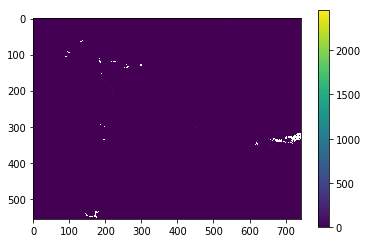

In [73]:
plt.imshow(elevation_NMAD['elevation'])
plt.colorbar()

### Enter xscale

In [ ]:
import xsca

In [103]:
def ols(x):
    fit = sm.OLS(x, x.time, missing='drop',).fit()
    return fit.slope

In [117]:
def xr_regression(y):
    #X = sm.add_constant(reg, prepend=True) # regressor matrix
    print(y.shape)
    mod = sm.GLSAR(y, y.time, 2, missing = 'drop') # MLR analysis with AR2 modeling
    res = mod.iterative_fit()

    return xr.DataArray(res.params[1:])

In [118]:
stacked = elevation_xarray.stack(allpoints = ['lat', 'lon']).squeeze()
stacked = stacked.reset_coords(drop=True)
coefs = stacked.groupby('allpoints').apply(xr_regression)
coefs_unstacked = coefs.unstack('allpoints')

(29, 1)


ValueError: unrecognized data structures: <class 'xarray.core.dataarray.DataArray'> / <class 'xarray.core.dataarray.DataArray'>

In [124]:
stacked

<xarray.DataArray 'elevation' (time: 29, allpoints: 413108)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ..., 6213.6807, 6229.306 ,       nan]],
      dtype=float32)
Coordinates:
  * time       (time) float64 2.015e+03 2.015e+03 2.013e+03 2.003e+03 ...
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 3.104e+06 3.104e+06 3.104e+06 3.104e+06 ...
  - lon        (allpoints) float64 4.732e+05 4.733e+05 4.733e+05 4.733e+05 ...

In [125]:
stacked.shape

(29, 413108)

In [119]:
A=stacked.groupby('allpoints')

In [120]:
A.shape

AttributeError: 'DataArrayGroupBy' object has no attribute 'shape'

### implemented from https://gist.github.com/rabernat/bc4c6990eb20942246ce967e6c9c3dbe

In [121]:
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    print(x.shape)
    pf = np.polyfit(x.time, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])


In [123]:

# stack lat and lon into a single dimension called allpoints
#stacked = elevation_ds.stack(allpoints=['lat','lon'])
stacked = elevation_xarray.stack(allpoints=['lat','lon'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')

(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)
(29, 1)


In [86]:
trend_unstacked

<xarray.DataArray (dim_0: 1, allpoints_level_0: 556, allpoints_level_1: 743)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * allpoints_level_0  (allpoints_level_0) float64 3.086e+06 3.086e+06 ...
  * allpoints_level_1  (allpoints_level_1) float64 4.732e+05 4.733e+05 ...
Dimensions without coordinates: dim_0

In [95]:
trend_unstacked.shape

(1, 556, 743)

In [96]:
trend_unstacked[0,:,:]

<xarray.DataArray (allpoints_level_0: 556, allpoints_level_1: 743)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * allpoints_level_0  (allpoints_level_0) float64 3.086e+06 3.086e+06 ...
  * allpoints_level_1  (allpoints_level_1) float64 4.732e+05 4.733e+05 ...

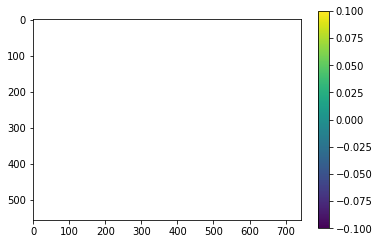

In [97]:
plt.imshow(trend_unstacked[0,:,:])
plt.colorbar()

In [98]:
trend_unstacked[0,:,:].mean()

<xarray.DataArray ()>
array(nan)

In [47]:
arr_data

<xarray.DataArray (x: 556, y: 743, time: 29)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan, 4482.1846, ...,       nan,       nan],
        [      nan, 4487.041 , ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan, 6229.428 ],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan, 4479.762 , ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan, 6229.306 ]

In [ ]:
geolib.gdaldem_mem_ma()